In [ ]:
# Biosignalsnotebooks python package
#!pip install biosignalsnotebooks
#import biosignalsnotebooks as bsnb

# Scientific packages
#!pip install pyedflib
from pyedflib import EdfReader
from numpy import zeros, arange
import numpy as np
import pyedflib
from google.colab import files
#!pip install mne
import mne


In [ ]:
import pyedflib

# Cargar el archivo .edf desde la ruta donde se ha subido
uploaded = files.upload()
edf_file_path = 'datos_corregidos.edf'
edf_reader = pyedflib.EdfReader(edf_file_path)

# Obtener y mostrar información básica del archivo
n_signals = edf_reader.signals_in_file
signal_labels = edf_reader.getSignalLabels()
sample_frequencies = edf_reader.getSampleFrequencies()

print(f"Number of signals: {n_signals}")
print(f"Signal labels: {signal_labels}")
print(f"Sample frequencies: {sample_frequencies}")

# Leer una señal específica, por ejemplo, la primera señal
signal_index = 0
signal_data = edf_reader.readSignal(signal_index)

print(f"First few samples of signal '{signal_labels[signal_index]}': {signal_data[:10]}")

signals = []
for i in range(n_signals):
    signals.append(edf_reader.readSignal(i))

# Convertir las señales en un array de NumPy
signals = np.array(signals)

# Cerrar el archivo después de la lectura
edf_reader.close()

Saving datos_corregidos.edf to datos_corregidos.edf
Number of signals: 19
Signal labels: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T7', 'T8', 'C3', 'C4', 'P7', 'P8', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz']
Sample frequencies: [500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500.]
First few samples of signal 'Fp1': [-0.01525975  1.67751085  3.25388765  4.54434057  5.42488492  5.84491469
  5.82214199  5.43753642  4.80243116  4.0281594 ]


Saving datos_corregidos.edf to datos_corregidos (1).edf
Number of signals: 19
Signal labels: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T7', 'T8', 'C3', 'C4', 'P7', 'P8', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz']
Sample frequencies: [500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500.]
Creating RawArray with float64 data, n_channels=19, n_times=25500
    Range : 0 ... 25499 =      0.000 ...    50.998 secs
Ready.
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


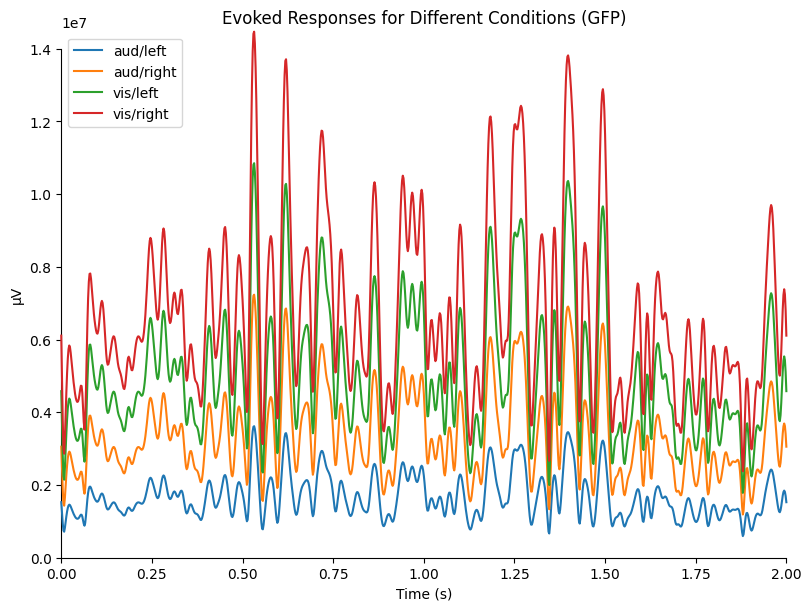

[<Figure size 800x600 with 1 Axes>]

In [ ]:


# Subir el archivo .edf a Google Colab
uploaded = files.upload()
edf_file_path = 'datos_corregidos.edf'
edf_reader = pyedflib.EdfReader(edf_file_path)

# Obtener y mostrar información básica del archivo
n_signals = edf_reader.signals_in_file
signal_labels = edf_reader.getSignalLabels()
sample_frequencies = edf_reader.getSampleFrequencies()

print(f"Number of signals: {n_signals}")
print(f"Signal labels: {signal_labels}")
print(f"Sample frequencies: {sample_frequencies}")

# Leer todas las señales
signals = []
for i in range(n_signals):
    signals.append(edf_reader.readSignal(i))

# Convertir las señales en un array de NumPy
signals = np.array(signals)
signal = signal_data  # Usa la señal real extraída del archivo .edf

# Calcular RMS
signal_rms = np.sqrt(np.mean(signal**2))

# Calcular desviación estándar
signal_std = np.std(signal)

# Calcular mínimo
signal_min = np.min(signal)

# Calcular máximo
signal_max = np.max(signal)
# Cerrar el archivo después de la lectura
edf_reader.close()

# Crear estructura de información MNE
info = mne.create_info(ch_names=signal_labels, sfreq=sample_frequencies[0], ch_types='eeg')
raw = mne.io.RawArray(signals, info)

# Suponiendo que tienes eventos, de lo contrario, generar eventos ficticios
events = mne.make_fixed_length_events(raw, duration=2)

# Crear y calcular promedios evocados sin corrección de baseline
epochs = mne.Epochs(raw, events, tmin=0, tmax=2, baseline=(None))
evoked = epochs.average()

# Definir condiciones y escalar los datos
conds = ("aud/left", "aud/right", "vis/left", "vis/right")
evoked_list = [evoked.copy() for _ in conds]

# Modificar los comentarios y escalar los datos para diferenciarlos
for idx, evk in enumerate(evoked_list, start=1):
    evk.comment = conds[idx - 1]
    evk.data *= idx  # Escalar los datos para diferenciarlos

# Crear diccionario de evoked responses
evks = dict(zip(conds, evoked_list))

# Graficar las señales utilizando comentarios personalizados
mne.viz.plot_compare_evokeds(evks, picks="eeg", title="Evoked Responses for Different Conditions")



combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


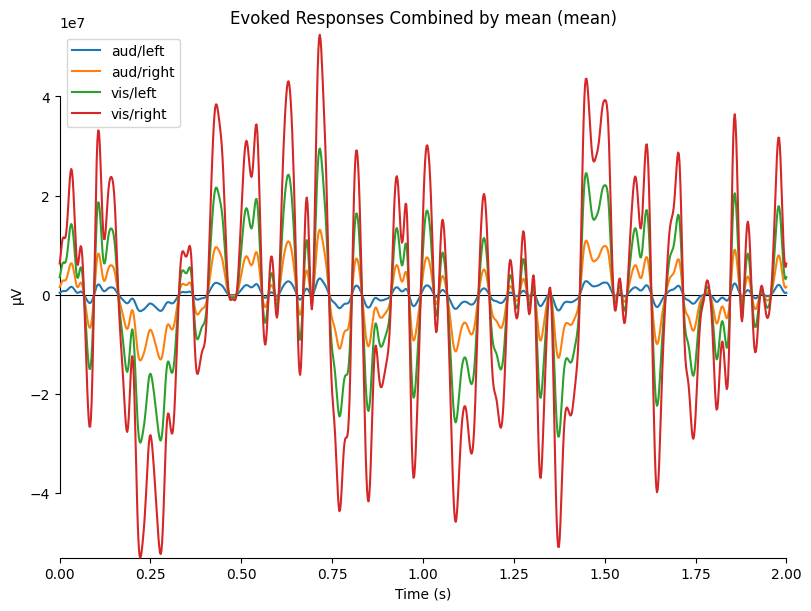

combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"


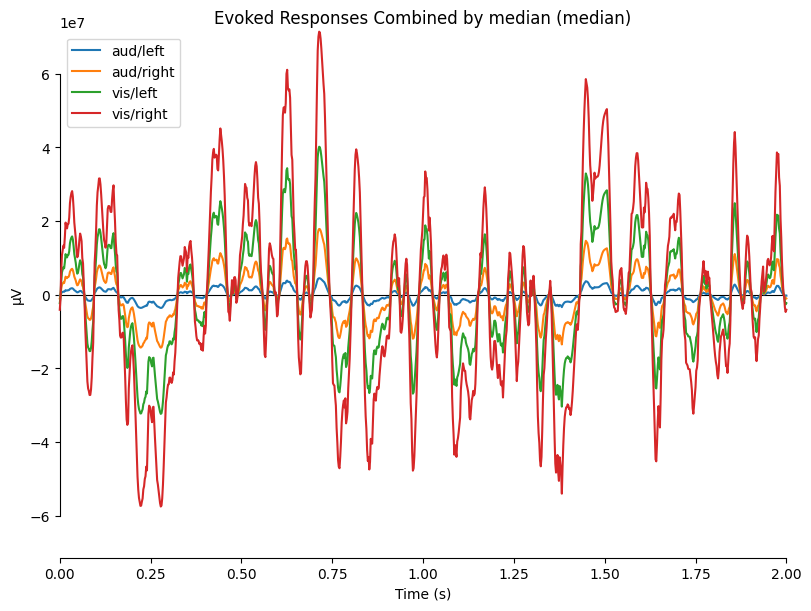

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


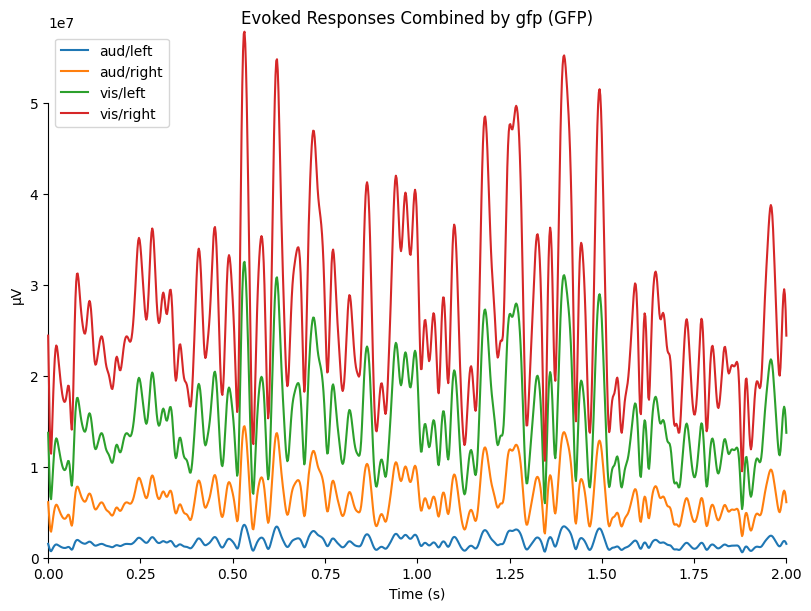

combining channels using "<function custom_func at 0x7f767cffe8c0>"
combining channels using "<function custom_func at 0x7f767cffe8c0>"
combining channels using "<function custom_func at 0x7f767cffe8c0>"
combining channels using "<function custom_func at 0x7f767cffe8c0>"


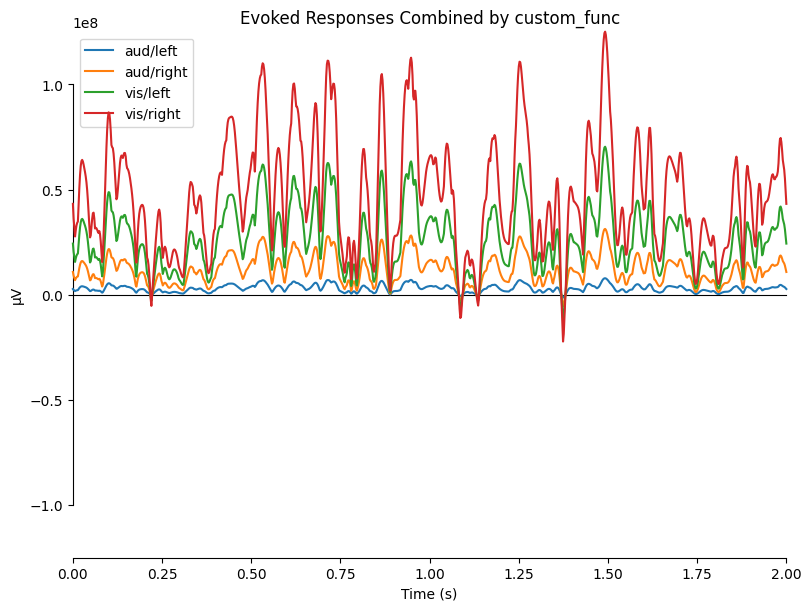

In [ ]:
# Modificar los comentarios y escalar los datos para diferenciarlos
for idx, evk in enumerate(evoked_list, start=1):
    evk.comment = conds[idx - 1]
    evk.data *= idx  # Escalar los datos para diferenciarlos

# Crear diccionario de evoked responses
evks = dict(zip(conds, evoked_list))

# Definir función personalizada
def custom_func(x):
    return x.max(axis=1)

# Comparar evoked responses utilizando diferentes combinaciones
combine_methods = ("mean", "median", "gfp", custom_func)

for combine in combine_methods:
    mne.viz.plot_compare_evokeds(evks, picks="eeg", combine=combine, title=f'Evoked Responses Combined by {combine if isinstance(combine, str) else "custom_func"}')

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


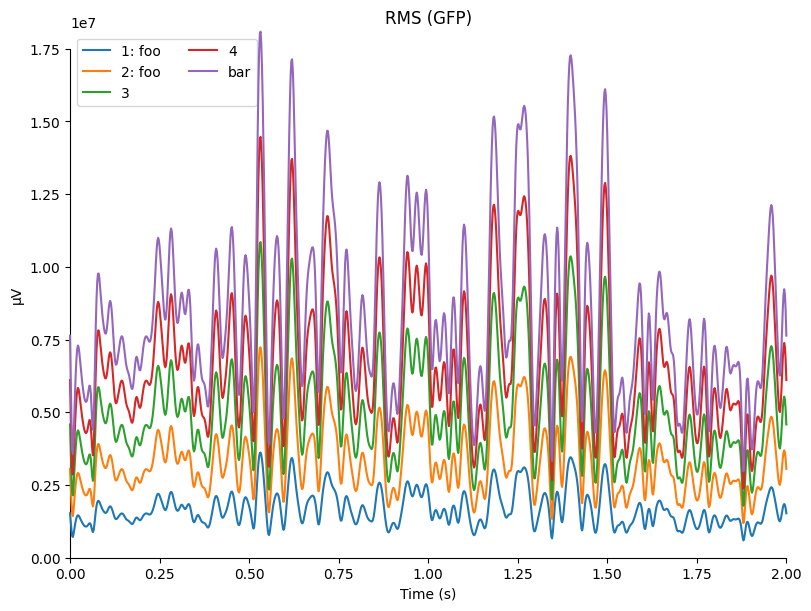

[<Figure size 800x600 with 1 Axes>]

In [ ]:
evokeds_list = [epochs.average()]
temp_list = list()
for idx, _comment in enumerate(("foo", "foo", "", None, "bar"), start=1):
    _evk = evokeds_list[0].copy()
    _evk.comment = _comment
    _evk.data *= idx  # Escalar los datos para diferenciarlos
    temp_list.append(_evk)

# Graficar las señales utilizando comentarios personalizados
mne.viz.plot_compare_evokeds(temp_list, picks="eeg", title="RMS")